In [1]:
#Importing the libraries: Pandas and Seaborn

import pandas as pd
import seaborn as sns

In [2]:
#Importing the data from the csv file as DataFrame olympics
olympics=pd.read_csv('\\Users\\user\\Downloads\\athlete_events.csv')

In [3]:
olympics.info()     #Looking at the info summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [4]:
olympics.head(20)    #head of the DataFrame

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [5]:
'''Using IterativeImputer in sklearn to impute based on columns Year, Age, Height, Weight'''

#importing Imperative Imputer from sklearn library
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [6]:
#Building a list of columns that will be used for imputation, which are Year, Age, Height & Weight
numeric_cols=olympics.select_dtypes(include='number').columns

In [7]:
'''Creating an IterativeImputer object and 
setting its min_value and max_value parameters to be 
the minumum and maximum of corresponding columns'''

iter_imp=IterativeImputer(min_value=olympics[numeric_cols].min(), 
                            max_value=olympics[numeric_cols].max())

In [8]:
#Applying the imputer to fit and transform the columns to an imputed NumPy array
imputed_num=iter_imp.fit_transform(olympics[numeric_cols])

In [9]:
#Assigning the imputed array back to the original DataFrame's columns
olympics[numeric_cols]=imputed_num

In [10]:
#crosschecking the original DataFrame for the treated missing values
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  float64
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  float64
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(5), object(10)
memory usage: 31.0+ MB


In [11]:
#Filling the missing values in the column Medal with string of 'NA'
olympics['Medal'] = olympics['Medal'].fillna('NA')

In [12]:
#Double checking that the columns are all imputed

olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  float64
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  float64
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
dtypes: float64(5), object(10)
memory usage: 31.0+ MB


In [13]:
olympics[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,271116.0,68248.954396,39022.286345,1.0,34643.0,68205.000000,102097.25,135571.0
Age,271116.0,25.601038,6.286568,10.0,22.0,25.000000,28.00,97.0
Height,271116.0,175.157169,9.316841,127.0,170.0,174.664796,180.00,226.0
Weight,271116.0,70.820002,12.664220,25.0,63.0,70.519112,76.00,214.0
Year,271116.0,1978.378480,29.877632,1896.0,1960.0,1988.000000,2002.00,2016.0


array([[<Axes: title={'center': 'ID'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'Year'}>, <Axes: >]], dtype=object)

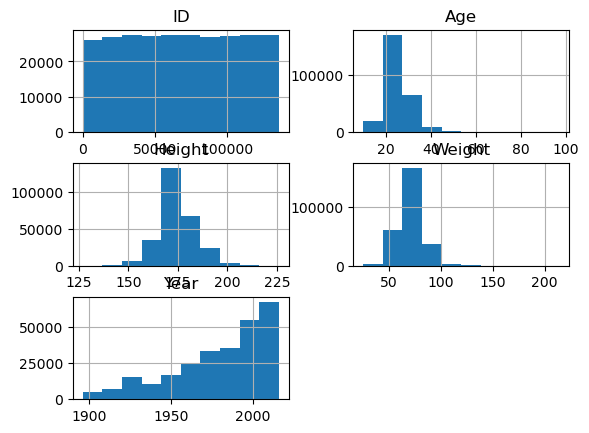

In [14]:
#Plotting the histograms of the numerical columns using Pandas
olympics[numeric_cols].hist()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


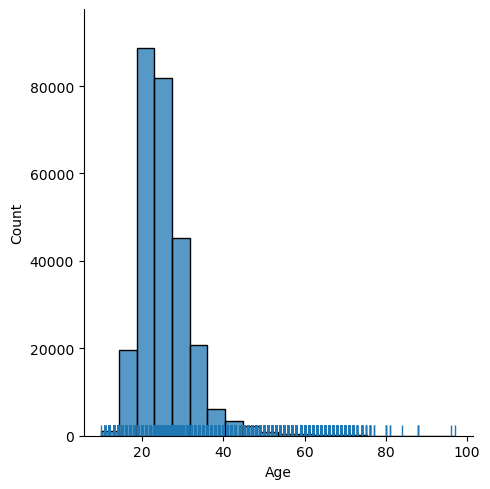

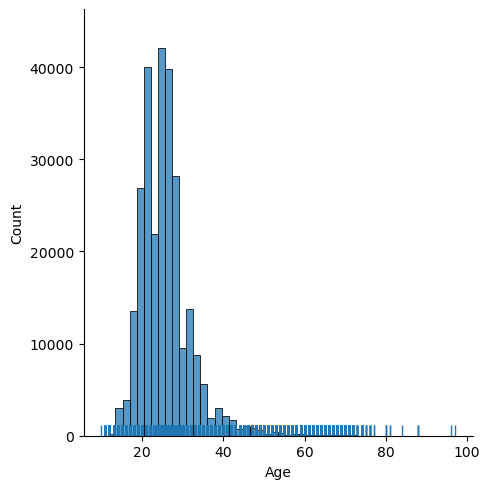

In [15]:
#Plot the histogram with a rug plot of the column Age using Seaborn, with both 20 and 50 bins

# Create histograms with 20 and 50 bins
sns.displot(data=olympics, x="Age", kind = 'hist', bins=20, rug=True)


sns.displot(data=olympics, x="Age", kind = 'hist', bins=50, rug=True)


<Axes: >

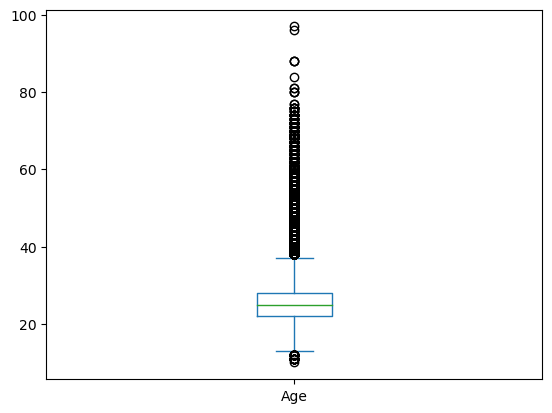

In [16]:
#Plotting the boxplot of the column Age using Pandas

olympics['Age'].plot(kind='box')

<Axes: ylabel='Age'>

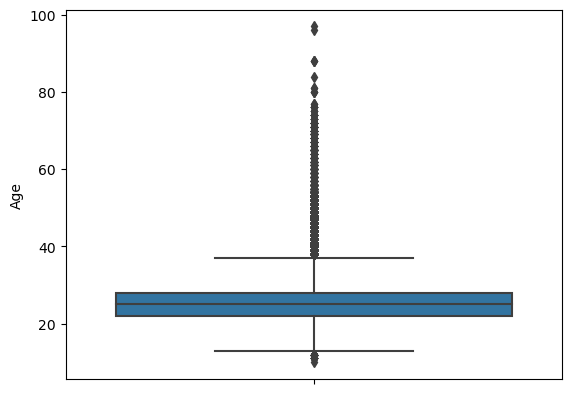

In [17]:
#Plotting the boxplot of the column Age using Seaborn
sns.boxplot(data=olympics, y = 'Age')

In [18]:
#Handling the Outliers in Age column
#By calculating the first quartile, third quartile, and IQR of the column Age
Q1=olympics['Age'].quantile(0.25)
Q3=olympics['Age'].quantile(0.75)

IQR=Q3-Q1
IQR


6.0

In [19]:
#Printing out the lower and upper thresholds for outliers based on IQR for the column Age
outlier_low=Q1-1.5*IQR

outlier_low


13.0

In [20]:
outlier_high=Q3+1.5*IQR
outlier_high

37.0

In [21]:
# What are the Sport for the athletes of really young age
### Filtering for the column Sport when the column Age has outliers of lower values

# Defining the outlier threshold for "Age" 
age_threshold = olympics["Age"].quantile(0.05)  # 5th percentile

# Filteingr data where "Age" is below the threshold
outlier_filtered_data = olympics[olympics["Age"]< age_threshold]

# Extracting the "Sport" column from the filtered data
sports = outlier_filtered_data["Sport"]

# Printing the filtered "Sport" data as needed
print(sports)

87                         Luge
204                   Athletics
265              Figure Skating
295       Synchronized Swimming
296       Synchronized Swimming
                  ...          
270965            Alpine Skiing
270973                   Tennis
270974                   Tennis
271001    Synchronized Swimming
271002    Synchronized Swimming
Name: Sport, Length: 12508, dtype: object


In [22]:
# What are the Sport for the athletes of really young age
### Filtering for the column Sport when the column Age has outliers of lower values

# Defining the outlier threshold for "Age" 
age_threshold = olympics["Age"].quantile(0.75)  # 5th percentile

# Filteingr data where "Age" is below the threshold
outlier_filtered_data = olympics[olympics["Age"]> age_threshold]

# Extracting the "Sport" column from the filtered data
sports = outlier_filtered_data["Sport"]

# Printing the filtered "Sport" data as needed
print(sports)

3                   Tug-Of-War
10        Cross Country Skiing
11        Cross Country Skiing
12        Cross Country Skiing
13        Cross Country Skiing
                  ...         
271099               Wrestling
271110              Basketball
271111                    Luge
271114               Bobsleigh
271115               Bobsleigh
Name: Sport, Length: 63102, dtype: object


In [23]:
#Looking at the unique values of Sport and their counts when Age are high-valued outliers


# Define the outlier threshold for "Age" 
age_threshold = olympics["Age"].quantile(0.95)  # 95th percentile

# Filter data where "Age" is above the threshold
outlier_data = olympics[olympics["Age"] > age_threshold]

# Count unique values of "Sport" for high-valued outliers
sport_counts = outlier_data["Sport"].value_counts()

# Print the counts
print("Unique Sports and Their Counts for High-Valued Outliers in Age:")
print(sport_counts)

#Did I find any sports popular for older age athletes?
#Answer: Shooting

Unique Sports and Their Counts for High-Valued Outliers in Age:
Sport
Shooting                 3178
Art Competitions         2226
Equestrianism            1997
Sailing                  1040
Fencing                  1031
Athletics                 408
Archery                   311
Bobsleigh                 230
Gymnastics                167
Rowing                    122
Cycling                    99
Curling                    98
Table Tennis               83
Cross Country Skiing       81
Biathlon                   78
Canoeing                   71
Tennis                     70
Ice Hockey                 51
Wrestling                  46
Golf                       42
Weightlifting              42
Speed Skating              36
Polo                       33
Figure Skating             30
Handball                   29
Water Polo                 29
Hockey                     29
Luge                       26
Alpine Skiing              25
Skeleton                   23
Beach Volleyball           16


In [24]:
#Checking for the number of unique values in each column

olympics.nunique()

ID        135571
Name      134732
Sex            2
Age         6798
Height     38967
Weight     40442
Team        1184
NOC          230
Games         51
Year          35
Season         2
City          42
Sport         66
Event        765
Medal          4
dtype: int64

In [25]:
#Using the describe method to check the non-numerical columns

non_num_cols=olympics.select_dtypes(exclude='number').columns
olympics[non_num_cols].describe().T

,count,unique,top,freq
Name,271116,134732,Robert Tait McKenzie,58
Sex,271116,2,M,196594
Team,271116,1184,United States,17847
NOC,271116,230,USA,18853
Games,271116,51,2000 Summer,13821
Season,271116,2,Summer,222552
City,271116,42,London,22426
Sport,271116,66,Athletics,38624
Event,271116,765,Football Men's Football,5733
Medal,271116,4,NA,231333


In [26]:
#Applying the value_counts method for each non-numerical column, 
#to check for their unique values and counts
olympics['Name'].value_counts().nunique()

37

In [27]:
olympics['Sex'].value_counts().nunique()

2

In [28]:
olympics['Team'].value_counts().nunique()

224

In [29]:
olympics['NOC'].value_counts().nunique()

199

In [30]:
olympics['Games'].value_counts().nunique()

51

In [31]:
olympics['Season'].value_counts().nunique()

2

In [32]:
olympics['City'].value_counts().nunique()

42

In [33]:
olympics['Sport'].value_counts().nunique()

65

In [34]:
olympics['Event'].value_counts().nunique()

433

In [35]:
olympics['Medal'].value_counts().nunique()

4

In [36]:
#Checking the first record within the dataset for each Olympic Sport

olympics.sort_values('Year').groupby('Sport').first()



,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Event,Medal
Sport,,,,,,,,,,,,,,
Aeronautics,107506.0,Hermann Schreiber,M,26.000000,174.403911,70.904711,Switzerland,SUI,1936 Summer,1936.0,Summer,Berlin,Aeronautics Mixed Aeronautics,Gold
Alpine Skiing,32818.0,Reat Erce,M,17.000000,175.005770,69.094543,Turkey,TUR,1936 Winter,1936.0,Winter,Garmisch-Partenkirchen,Alpine Skiing Men's Combined,NA
Alpinism,74134.0,George Herbert Leigh Mallory,M,37.000000,173.631827,73.263940,Great Britain,GBR,1924 Winter,1924.0,Winter,Chamonix,Alpinism Mixed Alpinism,Gold
Archery,67722.0,Lecomte,M,27.632675,173.782782,71.327398,France,FRA,1900 Summer,1900.0,Summer,Paris,"Archery Men's Au Cordon Dore, 50 metres",NA
Art Competitions,48741.0,Konrad Hippenmeier,M,31.000000,173.809471,72.043071,Switzerland,SUI,1912 Summer,1912.0,Summer,Stockholm,Art Competitions Mixed Architecture,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tug-Of-War,86368.0,August Nilsson,M,27.000000,173.795093,71.174354,Denmark/Sweden,SWE,1900 Summer,1900.0,Summer,Paris,Tug-Of-War Men's Tug-Of-War,Gold
Volleyball,14306.0,Georgi Spasov Boyadzhiev,M,21.000000,177.000000,76.000000,Bulgaria,BUL,1964 Summer,1964.0,Summer,Tokyo,Volleyball Men's Volleyball,NA
Water Polo,74733.0,Auguste Jean Baptiste Louis Joseph Marc,M,19.000000,174.261343,69.506215,Pupilles de Neptune de Lille #2-1,FRA,1900 Summer,1900.0,Summer,Paris,Water Polo Men's Water Polo,Bronze


In [37]:
#What are the average Age, Height, Weight of female versus male Olympic athletes
# Filter data for female and male athletes


pd.pivot_table(olympics,  
               index='Sex',
               values=['Age', 'Height', 'Weight'],
              aggfunc='mean')
    


,Age,Height,Weight
Sex,,,
F,23.748465,168.525019,61.012815
M,26.303285,177.671188,74.537568


In [38]:
#What are the minimum, average, maximum Age, Height, Weight of athletes in different Year

pd.pivot_table(olympics,
              index= 'Year',
              values= ['Age', 'Height', 'Weight'],
              aggfunc= ['min', 'mean', 'max'])

min                         mean                          max  \
         Age Height     Weight        Age      Height     Weight   Age   
Year                                                                     
1896.0  10.0  154.0  45.000000  25.368779  173.613297  71.021724  40.0   
1900.0  13.0  153.0  51.000000  28.461124  173.893268  71.668788  71.0   
1904.0  14.0  155.0  43.000000  26.871288  174.138514  71.388616  71.0   
1906.0  13.0  165.0  52.000000  27.275413  174.544313  71.872420  54.0   
1908.0  14.0  157.0  51.000000  27.065051  174.634351  72.018276  61.0   
1912.0  13.0  157.0  49.000000  27.529583  174.592530  71.750462  67.0   
1920.0  13.0  142.0  33.082594  28.863398  174.397895  71.904909  72.0   
1924.0  11.0  142.0  34.361653  28.102739  174.313611  71.496449  81.0   
1928.0  11.0  147.0  41.000000  28.731146  174.332340  71.546531  97.0   
1932.0  11.0  147.0  40.077177  32.006605  174.017017  71.922845  96.0   
1936.0  11.0  147.0  37.000000  27.506387  174.594580  71.355243  74.0   
1948.0  12.0  140.0  47.000000  28.408028  174.762026  71.540431  84.0   
1952.0  12.0  150.0  42.000000  26.165363  174.589915  70.854763  65.0   
1956.0  12.0  137.0  28.000000  25.949967  174.405326  70.822394  67.0   
1960.0  11.0  137.0  36.000000  25.188561  173.322652  69.486897  65.0   
1964.0  12.0  137.0  38.000000  24.949272  173.556836  69.770974  60.0   
1968.0  11.0  127.0  34.000000  24.264743  173.961060  69.611194  68.0   
1972.0  12.0  130.0  38.000000  24.319367  174.574060  70.015595  69.0   
1976.0  12.0  136.0  30.000000  23.850617  174.955804  70.097191  70.0   
1980.0  13.0  131.0  25.000000  23.733990  175.536138  70.654183  70.0   
1984.0  12.0  132.0  31.000000  23.926335  175.537961  70.271700  60.0   
1988.0  11.0  127.0  32.000000  24.086445  175.734026  70.481495  70.0   
1992.0  11.0  136.0  30.000000  24.320351  176.079293  70.990194  62.0   
1994.0  13.0  148.0  40.000000  24.422592  175.191691  71.008109  46.0   
1996.0  12.0  136.0  30.000000  24.915178  175.871021  70.855753  63.0   
1998.0  14.0  142.0  32.000000  25.163158  174.605898  70.916067  50.0   
2000.0  13.0  136.0  28.000000  25.422476  176.090405  71.111894  63.0   
2002.0  15.0  149.0  42.000000  25.916281  174.705223  71.159422  48.0   
2004.0  13.0  139.0  30.000000  25.639515  175.971323  71.284059  57.0   
2006.0  14.0  147.0  38.000000  25.959151  174.626832  70.510828  52.0   
2008.0  12.0  137.0  28.000000  25.733661  176.212068  71.377940  67.0   
2010.0  15.0  149.0  38.000000  26.124262  174.918437  70.733463  51.0   
2012.0  13.0  140.0  30.062904  25.961378  176.252345  71.179128  71.0   
2014.0  15.0  146.0  38.081224  25.987324  174.821101  70.575258  55.0   
2016.0  13.0  133.0  30.000000  26.207919  176.029759  70.971848  62.0   

                           
            Height Weight  
Year                       
1896.0  188.000000  106.0  
1900.0  191.000000  102.0  
1904.0  195.000000  115.0  
1906.0  196.000000  114.0  
1908.0  201.000000  115.0  
1912.0  200.000000  125.0  
1920.0  218.684340  146.0  
1924.0  218.522839  146.0  
1928.0  211.000000  125.0  
1932.0  200.000000  110.0  
1936.0  205.000000  138.0  
1948.0  213.000000  125.0  
1952.0  213.000000  145.0  
1956.0  218.000000  141.0  
1960.0  218.000000  141.0  
1964.0  218.000000  163.0  
1968.0  216.000000  163.0  
1972.0  223.000000  182.0  
1976.0  220.000000  163.0  
1980.0  220.000000  190.0  
1984.0  218.000000  150.0  
1988.0  223.000000  161.0  
1992.0  226.000000  176.5  
1994.0  200.000000  113.0  
1996.0  223.000000  176.5  
1998.0  200.000000  123.0  
2000.0  226.000000  180.0  
2002.0  201.000000  123.0  
2004.0  226.000000  198.0  
2006.0  206.000000  127.0  
2008.0  226.000000  214.0  
2010.0  206.000000  116.0  
2012.0  221.000000  214.0  
2014.0  206.000000  116.0  
2016.0  218.000000  170.0

In [39]:
#What are the minimum, average, median, maximum Age of athletes for different Season and Sex combinations

pd.pivot_table(olympics,
              index= ['Season', 'Sex'],
              values = 'Age',
              aggfunc= ['min', 'median', 'max'])

min median   max
             Age    Age   Age
Season Sex                   
Summer F    11.0   23.0  74.0
       M    10.0   25.0  97.0
Winter F    11.0   24.0  48.0
       M    12.0   25.0  58.0

In [40]:
#What are the average Age of athletes, and numbers of unique Team, Sport, Event, for different Season and Sex combinations

pd.pivot_table(olympics,
              index= ['Season', 'Sex'],
              values = 'Age',
              aggfunc = 'mean',
              columns = ['Team', 'Sport', 'Event'])

Team                             30. Februar A North American Team  \
Sport                                Sailing                  Polo   
Event      Sailing Mixed Two Person Keelboat       Polo Men's Polo   
Season Sex                                                           
Summer F                                 NaN                   NaN   
       M                                33.5             37.905648   
Winter F                                 NaN                   NaN   
       M                                 NaN                   NaN   

Team                                 Acipactli  \
Sport                                  Sailing   
Event      Sailing Mixed Three Person Keelboat   
Season Sex                                       
Summer F                                   NaN   
       M                             47.333333   
Winter F                                   NaN   
       M                                   NaN   

Team                                 Acturus                Afghanistan  \
Sport                                Sailing                  Athletics   
Event      Sailing Mixed Two Person Keelboat Athletics Men's 100 metres   
Season Sex                                                                
Summer F                                 NaN                        NaN   
       M                           26.698138                  23.428571   
Winter F                                 NaN                        NaN   
       M                                 NaN                        NaN   

Team                                                                      \
Sport                                                                      
Event      Athletics Men's 110 metres Hurdles Athletics Men's 200 metres   
Season Sex                                                                 
Summer F                                  NaN                        NaN   
       M                                 20.0                       20.0   
Winter F                                  NaN                        NaN   
       M                                  NaN                        NaN   

Team                                                                        \
Sport                                                                        
Event      Athletics Men's 4 x 100 metres Relay Athletics Men's 400 metres   
Season Sex                                                                   
Summer F                                    NaN                        NaN   
       M                                  21.25                       23.0   
Winter F                                    NaN                        NaN   
       M                                    NaN                        NaN   

Team                                      ...  \
Sport                                     ...   
Event      Athletics Men's Javelin Throw  ...   
Season Sex                                ...   
Summer F                             NaN  ...   
       M                            20.0  ...   
Winter F                             NaN  ...   
       M                             NaN  ...   

Team                                            Zimbabwe  \
Sport                                           Swimming   
Event      Swimming Women's 400 metres Individual Medley   
Season Sex                                                 
Summer F                                            24.0   
       M                                             NaN   
Winter F                                             NaN   
       M                                             NaN   

Team                                                                  \
Sport                                                         Tennis   
Event      Swimming Women's 50 metres Freestyle Tennis Men's Doubles   
Season Sex                                                             
Summer F                              16.

In [41]:
#filling the NaN values with constant(-999)

pd.pivot_table(olympics,
              index= ['Season', 'Sex'],
              values = 'Age',
              aggfunc = 'mean',
              columns = ['Team', 'Sport', 'Event'],
              fill_value = -999)

Team                             30. Februar A North American Team  \
Sport                                Sailing                  Polo   
Event      Sailing Mixed Two Person Keelboat       Polo Men's Polo   
Season Sex                                                           
Summer F                              -999.0           -999.000000   
       M                                33.5             37.905648   
Winter F                              -999.0           -999.000000   
       M                              -999.0           -999.000000   

Team                                 Acipactli  \
Sport                                  Sailing   
Event      Sailing Mixed Three Person Keelboat   
Season Sex                                       
Summer F                           -999.000000   
       M                             47.333333   
Winter F                           -999.000000   
       M                           -999.000000   

Team                                 Acturus                Afghanistan  \
Sport                                Sailing                  Athletics   
Event      Sailing Mixed Two Person Keelboat Athletics Men's 100 metres   
Season Sex                                                                
Summer F                         -999.000000                -999.000000   
       M                           26.698138                  23.428571   
Winter F                         -999.000000                -999.000000   
       M                         -999.000000                -999.000000   

Team                                                                      \
Sport                                                                      
Event      Athletics Men's 110 metres Hurdles Athletics Men's 200 metres   
Season Sex                                                                 
Summer F                               -999.0                     -999.0   
       M                                 20.0                       20.0   
Winter F                               -999.0                     -999.0   
       M                               -999.0                     -999.0   

Team                                                                        \
Sport                                                                        
Event      Athletics Men's 4 x 100 metres Relay Athletics Men's 400 metres   
Season Sex                                                                   
Summer F                                -999.00                     -999.0   
       M                                  21.25                       23.0   
Winter F                                -999.00                     -999.0   
       M                                -999.00                     -999.0   

Team                                      ...  \
Sport                                     ...   
Event      Athletics Men's Javelin Throw  ...   
Season Sex                                ...   
Summer F                          -999.0  ...   
       M                            20.0  ...   
Winter F                          -999.0  ...   
       M                          -999.0  ...   

Team                                            Zimbabwe  \
Sport                                           Swimming   
Event      Swimming Women's 400 metres Individual Medley   
Season Sex                                                 
Summer F                                            24.0   
       M                                          -999.0   
Winter F                                          -999.0   
       M                                          -999.0   

Team                                                                  \
Sport                                                         Tennis   
Event      Swimming Women's 50 metres Freestyle Tennis Men's Doubles   
Season Sex                                                             
Summer F                              16.

In [42]:
#What are the average Age, Height, Weight of athletes, for different Medal, Season, Sex combinations

pd.pivot_table(olympics,
              index= ['Medal','Season', 'Sex'],
              values = ['Age', 'Height', 'Weight'],
              aggfunc = 'mean')

Age      Height     Weight
Medal  Season Sex                                  
Bronze Summer F    24.637543  171.143138  63.937776
              M    26.383046  179.095890  76.631051
       Winter F    25.115578  167.380186  61.176678
              M    26.387058  178.781399  77.242682
Gold   Summer F    24.215099  171.624816  64.283900
              M    26.501980  179.581258  77.186422
       Winter F    25.202636  167.606195  62.051955
              M    26.606474  179.456963  77.926307
NA     Summer F    23.547859  168.319874  60.506471
              M    26.455114  177.330219  73.971034
       Winter F    23.855921  167.392116  60.657769
              M    25.386433  177.745588  74.864492
Silver Summer F    24.296110  171.348945  63.943929
              M    26.691230  179.147570  76.753852
       Winter F    25.240527  167.954131  61.962272
              M    26.430566  178.971994  77.364770

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


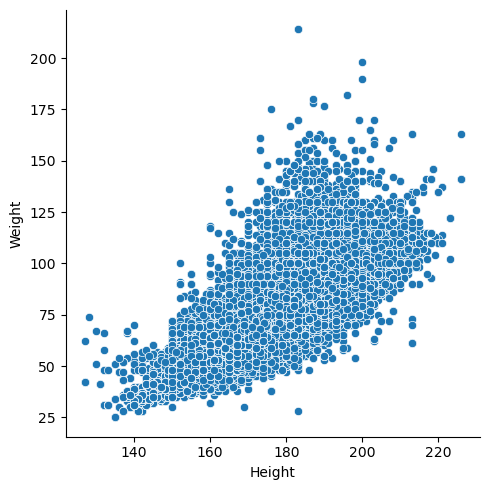

In [43]:
#Plot the scatterplot of Height and Weight

sns.relplot(olympics, x = 'Height', y = 'Weight', kind = 'scatter')

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


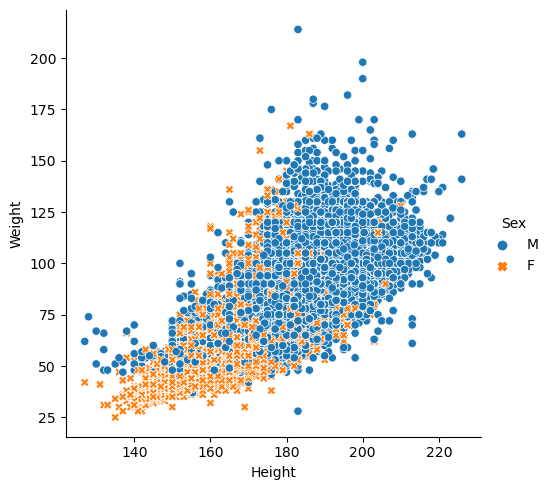

In [44]:
#Plot the scatterplot of Height and Weight, using different colors and styles of dots for different Sex

sns.relplot(olympics, x = 'Height', y = 'Weight', kind = 'scatter', hue = 'Sex', style = 'Sex')

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


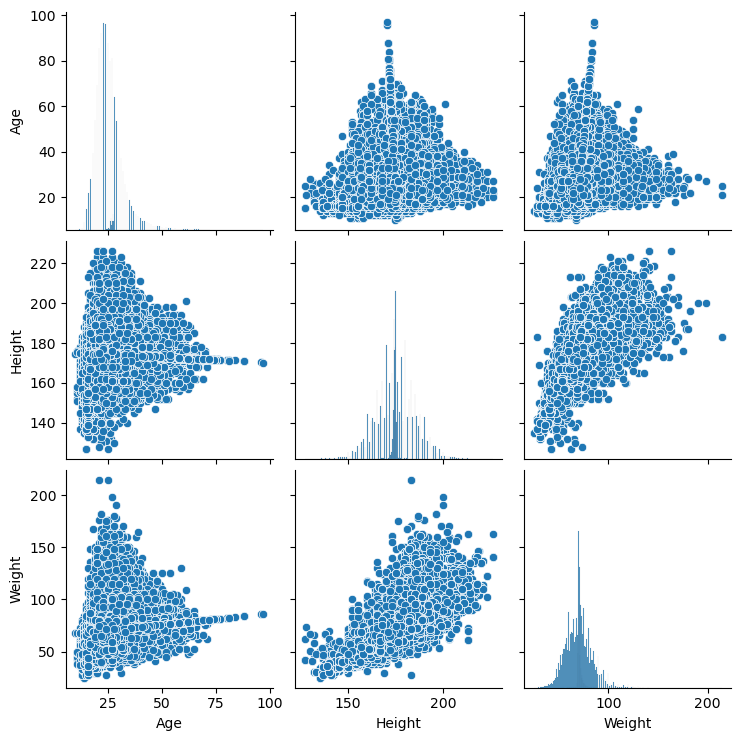

In [45]:
#Plot the pairwise relationships of Age, Height, Weight

#sns.displot(olympics, x= 'Height', y = 'Weight', hue = 'Age', kind = 'hist')

sns.pairplot(olympics[['Age', 'Height', 'Weight']])

In [49]:
#Print out the correlation matrix of Age, Height, Weight

olympics[['Age', 'Height', 'Weight']].corr()

,Age,Height,Weight
Age,1.000000,0.084693,0.205982
Height,0.084693,1.000000,0.794030
Weight,0.205982,0.794030,1.000000


<Axes: >

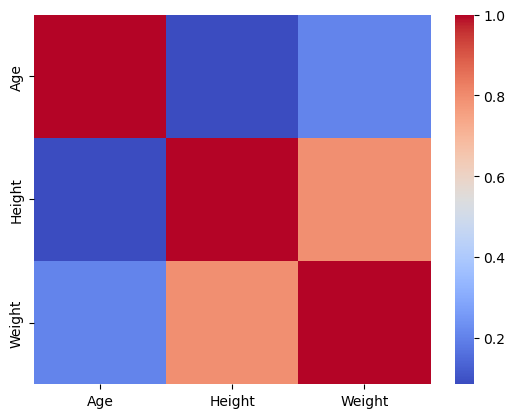

In [50]:
#Use heatmap to demonstrate the correlation matrix of Age, Height, Weight, 
#use a colormap (cmap) of 'crest'

sns.heatmap(olympics[['Age', 'Height', 'Weight']].corr(), cmap = 'coolwarm')

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


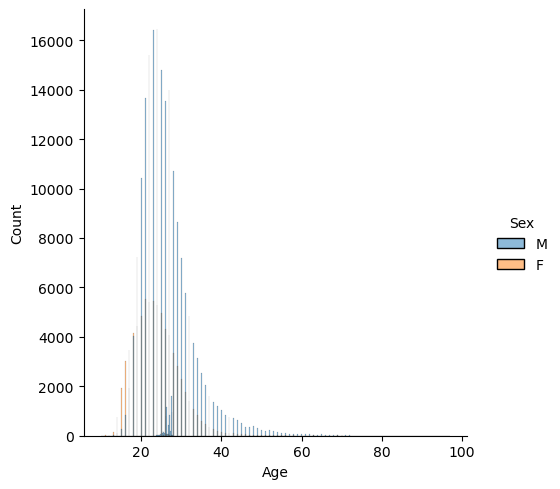

In [51]:
#Plot the histograms of Age, with different colors for different Sex

sns.displot(olympics, x = 'Age', hue = 'Sex')

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


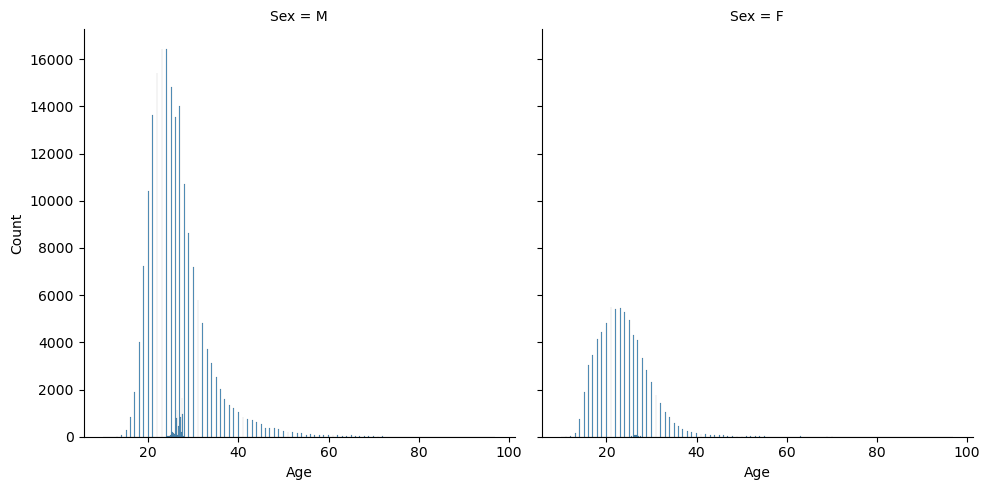

In [52]:
#Plot the histograms of Age, on separate plots for different Sex

sns.displot(olympics, x = 'Age', col = 'Sex')

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

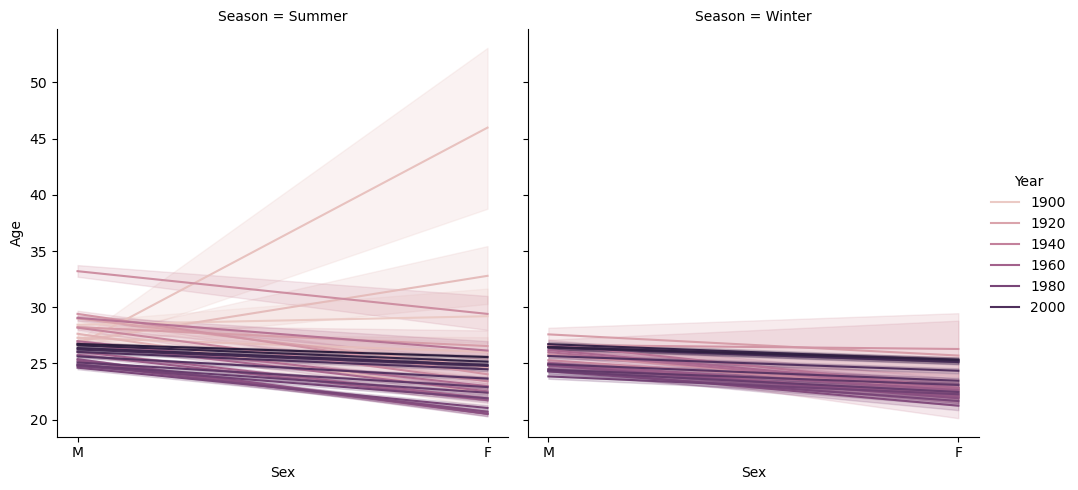

In [56]:
#Look at the changes of average Age across Year by line charts, with separate lines 
#for different Season using different colors

sns.relplot(olympics, y = 'Age', x = 'Sex', kind = 'line', hue = 'Year', col = 'Season')

<Axes: xlabel='Sex', ylabel='Age'>

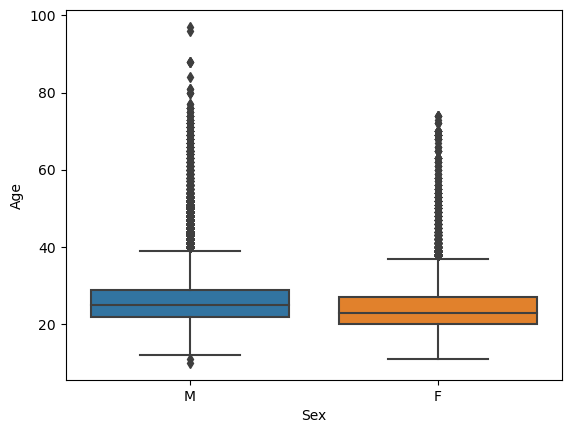

In [59]:
#Look at the distributions of Age for different Sex using boxplots

sns.boxplot(olympics, y = 'Age', x = 'Sex')

<Axes: xlabel='Sex', ylabel='Age'>

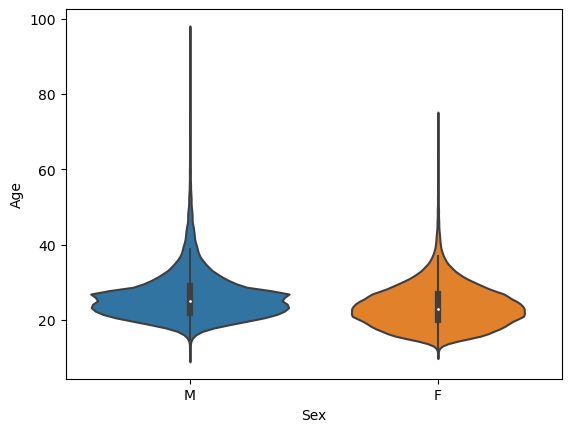

In [61]:
#Look at the distributions of Age for different Sex using violin plots

sns.violinplot(olympics, y = 'Age', x = 'Sex')

<Axes: xlabel='Sex', ylabel='Age'>

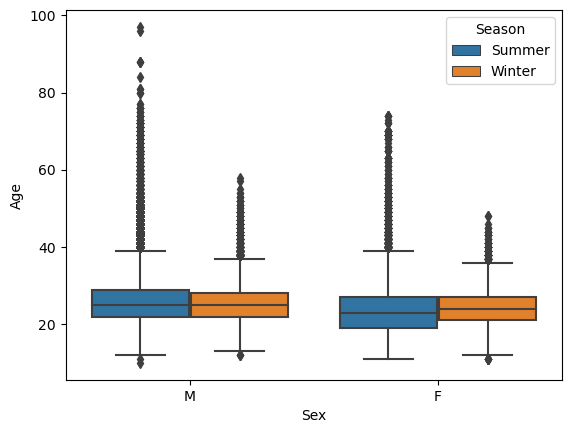

In [62]:
# Look at the distributions of Age for different Sex using boxplots, with different 
#colors of plots for different Season

sns.boxplot(olympics, y = 'Age', x = 'Sex', hue = 'Season')

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


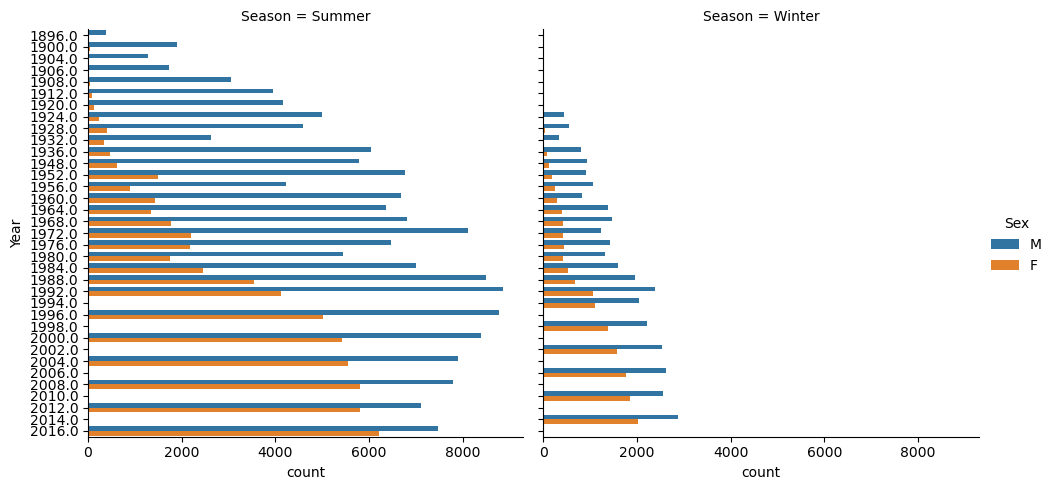

In [68]:
#Use count plots to look at the changes of number of athlete-events across Year, for different Sex by colors, 
#and different Season on separate plots

sns.catplot(olympics, y = 'Year', hue = 'Sex', kind = 'count', col = 'Season')

In [ ]:
"""1. What type of opportunities are learners signing up for per region(State/Country)?"""


# Create a pivot table to show opportunities signed up for per region
"""pivot_table = pd.pivot_table(NS_Opportunity,
                             index='Country', 
                             values='Opportunity Name', 
                             aggfunc='count').head(10)"""
"""# Create a bar chart to visualize the results
plt.figure(figsize=(20, 10))
sns.barplot(x="Country", y="Opportunity Name", hue="Opportunity Name", data=pivot_table.reset_index())
plt.title('Opportunities Signed Up For Per Region (Count)')
plt.xlabel('Region (Country)')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
#plt.tight_layout()

# Display the chart
plt.show()"""